<a href="https://colab.research.google.com/github/JasmineGonzalez2021/Computational-Modeling/blob/master/Q3_PROJECT_SUBSET_Jasmine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

[This](https://www.kaggle.com/chrisfilo/fruit-recognition) is the dataset I will be using.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import urllib
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as p3
import colorsys
from PIL import Image
from urllib.request import urlopen
from six.moves import urllib
from google.colab import drive
from operator import itemgetter 
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline

For the next step, you must upload a kaggle.json file. One can be downloaded to your computer by going to the [Kaggle website](https://kaggle.com). From the site header, click on your user profile picture, then on “My Account” from the dropdown menu. This will take you to your account settings [here](https://www.kaggle.com/account). Scroll down to the section of the page labelled API:

To create a new token, click on the “Create New API Token” button. This will download a fresh authentication token onto your machine. The downloaded file should be called "kaggle.json"

Upload that "kaggle.json" file in the cell below when you run it and it prompts you to choose a file.

This process will allow your computer to access the dataset on kaggle that the information for this project comes from without having to download hundreds of thousands of images of fruit to your machine.

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasminegonzalez","key":"1907e68e54f6f79b59b9e81afb507aa4"}'}

In [6]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Mar  9 20:26 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d chrisfilo/fruit-recognition
!unzip fruit-recognition.zip -d fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits/Pomegranate/Pomegranet00323.png  
  inflating: fruits/Pomegranate/Pomegranet00324.png  
  inflating: fruits/Pomegranate/Pomegranet00325.png  
  inflating: fruits/Pomegranate/Pomegranet00326.png  
  inflating: fruits/Pomegranate/Pomegranet00327.png  
  inflating: fruits/Pomegranate/Pomegranet00328.png  
  inflating: fruits/Pomegranate/Pomegranet00329.png  
  inflating: fruits/Pomegranate/Pomegranet0033.png  
  inflating: fruits/Pomegranate/Pomegranet00330.png  
  inflating: fruits/Pomegranate/Pomegranet00331.png  
  inflating: fruits/Pomegranate/Pomegranet00332.png  
  inflating: fruits/Pomegranate/Pomegranet00333.png  
  inflating: fruits/Pomegranate/Pomegranet00334.png  
  inflating: fruits/Pomegranate/Pomegranet00335.png  
  inflating: fruits/Pomegranate/Pomegranet00336.png  
  inflating: fruits/Pomegranate/Pomegranet00337.png  
  inflating: fruits/Pomegranate/Pomegranet00338.png  
  inflating: fruits/Pomegranate/

In [10]:
!ls /content/fruits

Apple	Carambola  Kiwi   muskmelon  Peach  Persimmon  Plum	    Tomatoes
Banana	Guava	   Mango  Orange     Pear   Pitaya     Pomegranate


An example of what an image looks like:

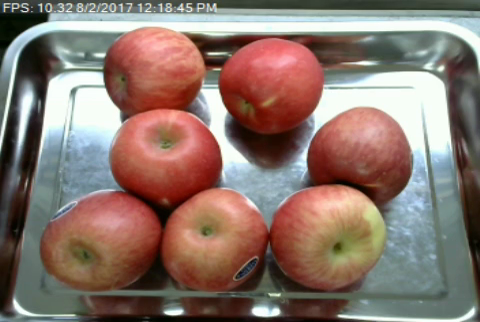

In [11]:
Image.open('fruits/Apple/Apple A/Apple 1.png')

#Creating Lists of Images of Each Fruit

In [12]:
!ls /content/fruits

Apple	Carambola  Kiwi   muskmelon  Peach  Persimmon  Plum	    Tomatoes
Banana	Guava	   Mango  Orange     Pear   Pitaya     Pomegranate


First, we test what it looks like to create and then show an image object of the very first apple image:

In [13]:
img = imread('/content/fruits/Apple/Apple A/Apple 1.png')
img

array([[[0.21176471, 0.25882354, 0.21568628],
        [0.21176471, 0.25882354, 0.21568628],
        [0.23529412, 0.2627451 , 0.22745098],
        ...,
        [0.3254902 , 0.38039216, 0.3529412 ],
        [0.32941177, 0.38431373, 0.35686275],
        [0.32941177, 0.38431373, 0.35686275]],

       [[0.21568628, 0.2627451 , 0.21960784],
        [0.20784314, 0.25490198, 0.21176471],
        [0.22745098, 0.24705882, 0.23921569],
        ...,
        [0.31764707, 0.37254903, 0.34509805],
        [0.32156864, 0.3764706 , 0.34901962],
        [0.32156864, 0.3764706 , 0.34901962]],

       [[0.21568628, 0.24705882, 0.21960784],
        [0.22745098, 0.25882354, 0.23137255],
        [0.21176471, 0.24313726, 0.2901961 ],
        ...,
        [0.29803923, 0.3529412 , 0.31764707],
        [0.3019608 , 0.35686275, 0.32156864],
        [0.3019608 , 0.35686275, 0.32156864]],

       ...,

       [[0.5254902 , 0.6313726 , 0.6627451 ],
        [0.5137255 , 0.61960787, 0.6509804 ],
        [0.49411765, 0

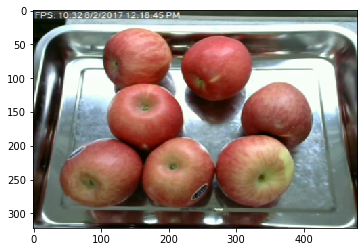

In [14]:
plt.imshow(img)

Now, we make a list of all of the images of apples as image objects stored in arrays defining the pixels of the image.

In [0]:
#apple_basepath = '/content/fruits/Apple/Total Number of Apples'
#apple_images = []
#for image_filename in os.listdir(apple_basepath[0:2071]):
    #img = imread(apple_basepath+'/'+image_filename)
    #apple_images.append(img)

We test that this worked by making sure a random item in this list is shown as an image.

In [0]:
#plt.imshow(apple_images[111])
#print(apple_images[111].shape)

Now, we apply this list making format to the images of every type of fruit in the dataset

In [0]:
apple_basepath = '/content/fruits/Apple/Total Number of Apples'
apple_list = []
for image_filename in os.listdir(apple_basepath[0:2071]):
    img = imread(apple_basepath+'/'+image_filename)
    apple_list.append(img)
banana_basepath = '/content/fruits/Banana'
banana_list = []
for image_filename in os.listdir(banana_basepath[0:2071]):
    img = imread(banana_basepath+'/'+image_filename)
    banana_list.append(img)
orange_basepath = '/content/fruits/Orange'
orange_list = []
for image_filename in os.listdir(orange_basepath[0:2071]):
    img = imread(orange_basepath+'/'+image_filename)
    orange_list.append(img)

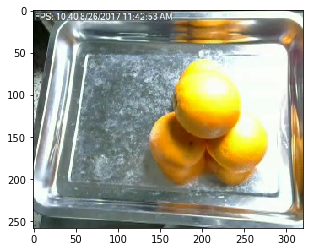

In [18]:
plt.imshow(orange_list[217])

#Making a Dataframe of the Images

In [0]:
all_fruit_lists = [apple_list, banana_list, orange_list]

In [0]:
fruit_names = ['Apple', 'Banana', 'Orange']
df = pd.DataFrame(all_fruit_lists)
df = np.transpose(df)
df = df.dropna()
df.columns = fruit_names
df

The below shows us an example of what first, a column of the dataframe looks like, and second, what a row of the dataframe looks like.

In [33]:
print(df['Apple'])
print(df[:1])

0       [[[0.4392157, 0.47058824, 0.41960785], [0.4274...
1       [[[0.20392157, 0.23137255, 0.19215687], [0.188...
2       [[[197, 206, 189], [182, 191, 174], [177, 186,...
3       [[[0.12941177, 0.18039216, 0.16078432], [0.176...
4       [[[0.3647059, 0.32941177, 0.3254902], [0.36470...
                              ...                        
3007    [[[0.49803922, 0.5764706, 0.54901963], [0.4705...
3008    [[[0.16078432, 0.21176471, 0.21176471], [0.160...
3009    [[[0.16078432, 0.21176471, 0.21176471], [0.160...
3010    [[[109, 110, 104], [110, 111, 105], [100, 101,...
3011    [[[0.11764706, 0.13725491, 0.15686275], [0.149...
Name: Apple, Length: 3012, dtype: object
                                               Apple  ...                                             Orange
0  [[[0.4392157, 0.47058824, 0.41960785], [0.4274...  ...  [[[0.24705882, 0.20784314, 0.15686275], [0.286...

[1 rows x 3 columns]


The below code reinforces that the values in the dataframe above can, in fact, be converted back into images.

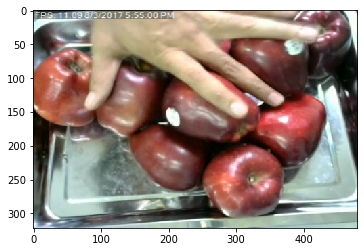

In [34]:
plt.imshow(df.loc[0,'Apple'])

#Preparing the data for machine learning

Below, we make a dataframe of target values to match the dataframe of raw data. This basically means creating a string "Apple" for each entry in the raw dataset that is an image of an apple, etc.

In [0]:
apple_target_list = []
for i in range(3012):
  apple_target_list.append('Apple')
banana_target_list = []
for i in range(3012):
  banana_target_list.append('Banana')
orange_target_list = []
for i in range(3012):
  orange_target_list.append('Orange')

In [0]:
all_target_lists = [apple_target_list, banana_target_list, orange_target_list]
target_df = pd.DataFrame(all_target_lists)
target_df = np.transpose(target_df)

In [79]:
target_df

,0,1,2
0,Apple,Banana,Orange
1,Apple,Banana,Orange
2,Apple,Banana,Orange
3,Apple,Banana,Orange
4,Apple,Banana,Orange
...,...,...,...
3007,Apple,Banana,Orange
3008,Apple,Banana,Orange
3009,Apple,Banana,Orange
3010,Apple,Banana,Orange


Now, we turn these datasets into numpy arrays

In [80]:
df = df.to_numpy()
df

array([[array([[[0.4392157 , 0.47058824, 0.41960785],
        [0.42745098, 0.45882353, 0.40392157],
        [0.37254903, 0.44313726, 0.44313726],
        ...,
        [0.39215687, 0.44313726, 0.40784314],
        [0.4       , 0.45490196, 0.41960785],
        [0.38431373, 0.4392157 , 0.40392157]],

       [[0.41960785, 0.4509804 , 0.4       ],
        [0.43529412, 0.46666667, 0.41960785],
        [0.38431373, 0.45882353, 0.45882353],
        ...,
        [0.47058824, 0.5254902 , 0.49019608],
        [0.43137255, 0.4862745 , 0.4509804 ],
        [0.40784314, 0.4627451 , 0.42745098]],

       [[0.4392157 , 0.47058824, 0.43529412],
        [0.43137255, 0.4627451 , 0.42745098],
        [0.3764706 , 0.45882353, 0.4509804 ],
        ...,
        [0.5882353 , 0.6431373 , 0.6039216 ],
        [0.48235294, 0.5372549 , 0.49803922],
        [0.45490196, 0.50980395, 0.47058824]],

       ...,

       [[0.8666667 , 0.98039216, 1.        ],
        [0.8666667 , 0.98039216, 1.        ],
        [0.854

In [81]:
target_df = target_df.to_numpy()
target_df

array([['Apple', 'Banana', 'Orange'],
       ['Apple', 'Banana', 'Orange'],
       ['Apple', 'Banana', 'Orange'],
       ...,
       ['Apple', 'Banana', 'Orange'],
       ['Apple', 'Banana', 'Orange'],
       ['Apple', 'Banana', 'Orange']], dtype=object)

In [82]:
df = df.flatten()
df

array([array([[[0.4392157 , 0.47058824, 0.41960785],
        [0.42745098, 0.45882353, 0.40392157],
        [0.37254903, 0.44313726, 0.44313726],
        ...,
        [0.39215687, 0.44313726, 0.40784314],
        [0.4       , 0.45490196, 0.41960785],
        [0.38431373, 0.4392157 , 0.40392157]],

       [[0.41960785, 0.4509804 , 0.4       ],
        [0.43529412, 0.46666667, 0.41960785],
        [0.38431373, 0.45882353, 0.45882353],
        ...,
        [0.47058824, 0.5254902 , 0.49019608],
        [0.43137255, 0.4862745 , 0.4509804 ],
        [0.40784314, 0.4627451 , 0.42745098]],

       [[0.4392157 , 0.47058824, 0.43529412],
        [0.43137255, 0.4627451 , 0.42745098],
        [0.3764706 , 0.45882353, 0.4509804 ],
        ...,
        [0.5882353 , 0.6431373 , 0.6039216 ],
        [0.48235294, 0.5372549 , 0.49803922],
        [0.45490196, 0.50980395, 0.47058824]],

       ...,

       [[0.8666667 , 0.98039216, 1.        ],
        [0.8666667 , 0.98039216, 1.        ],
        [0.8549

In [83]:
target_df = target_df.flatten()
target_df

array(['Apple', 'Banana', 'Orange', ..., 'Apple', 'Banana', 'Orange'],
      dtype=object)

In [0]:
#for element in x_train:
  #element = element[:258]
#for element in x_test:
  #element = element[:258]
#for element in y_train:
  #element = element[:4]
#for element in y_test:
  #element = element[:4]

In [142]:
#print(len(x_train[1]))

322


In [133]:
#this = x_train[1]
#this = this[:258]
#print(len(this))

258


#The Machine Learning

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df, target_df, test_size=0.25, random_state=0)

In [155]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

ValueError: ignored

In [156]:
logisticRegr.predict(x_test[0].reshape(1,-1))

NotFittedError: ignored

In [157]:
logisticRegr.predict(x_test[0:10])

NotFittedError: ignored

In [158]:
predictions = logisticRegr.predict(x_test)
predictions

NotFittedError: ignored

ValueError: ignored

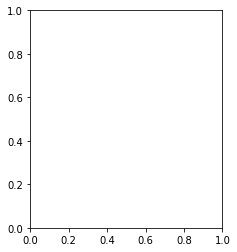

In [159]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_test[20:25], y_test[20:25])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)